# Import Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wc_history = pd.read_csv("/content/drive/MyDrive/data/team_performances_all_wcs.csv")
wc_history.head()

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101


In [3]:
odi_results = pd.read_csv("/content/drive/MyDrive/data/odi_results_2015_after.csv")
odi_results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


In [4]:
odi_results.drop(odi_results[(odi_results['Winner'] == 'Match abandoned' )].index, inplace=True)
odi_results.drop(odi_results[(odi_results['Winner'] == 'No result' )].index, inplace=True)

# Data Exploration

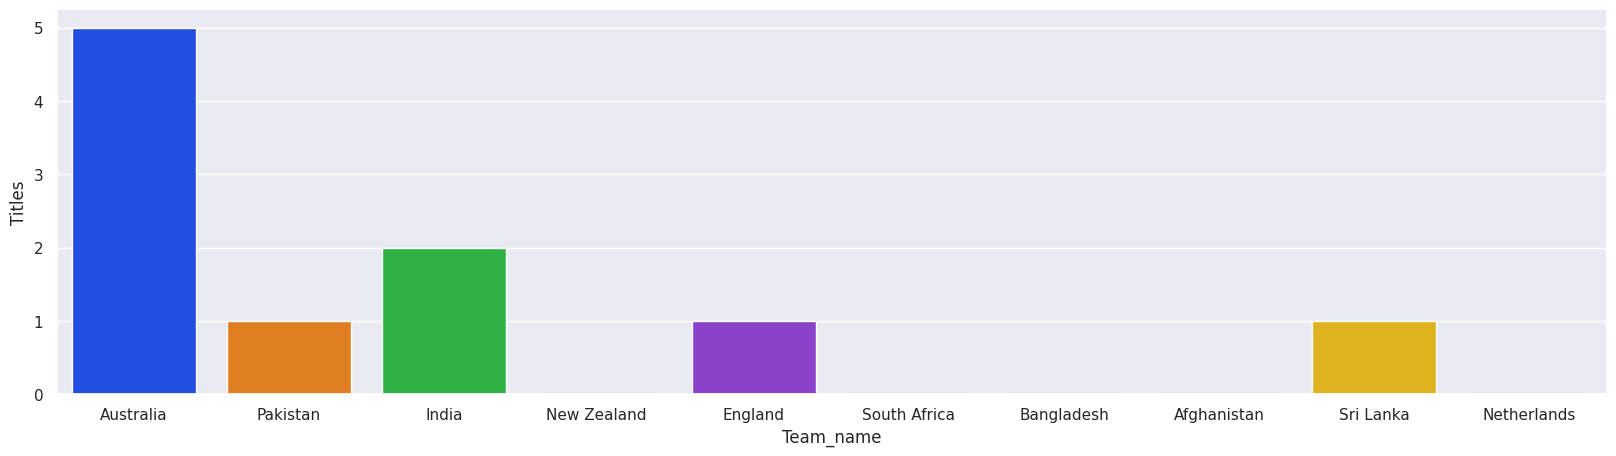

In [5]:
# Number of titles won by each team

sns.set(rc={'figure.figsize' : (20,5)}) # Set the figure size and color palette
sns.set_palette("bright")

sns.barplot(x='Team_name', y='Titles', data=wc_history)
plt.show()

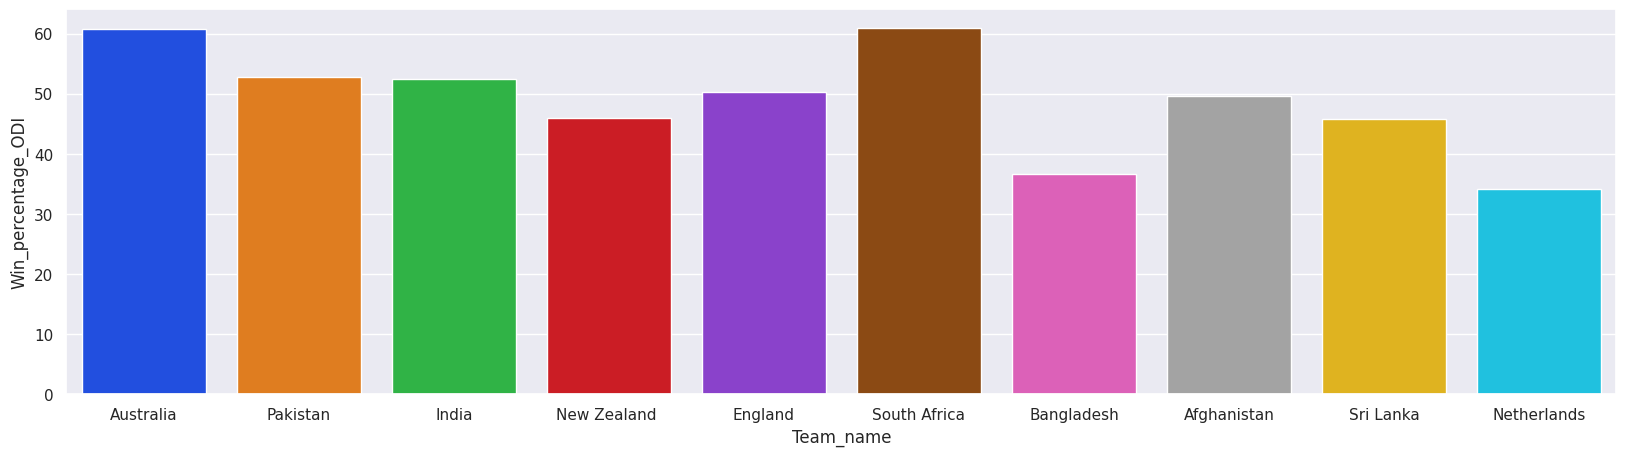

In [6]:
# Win percentage in ODI by each team
sns.barplot(x='Team_name', y='Win_percentage_ODI', data=wc_history)
plt.show()

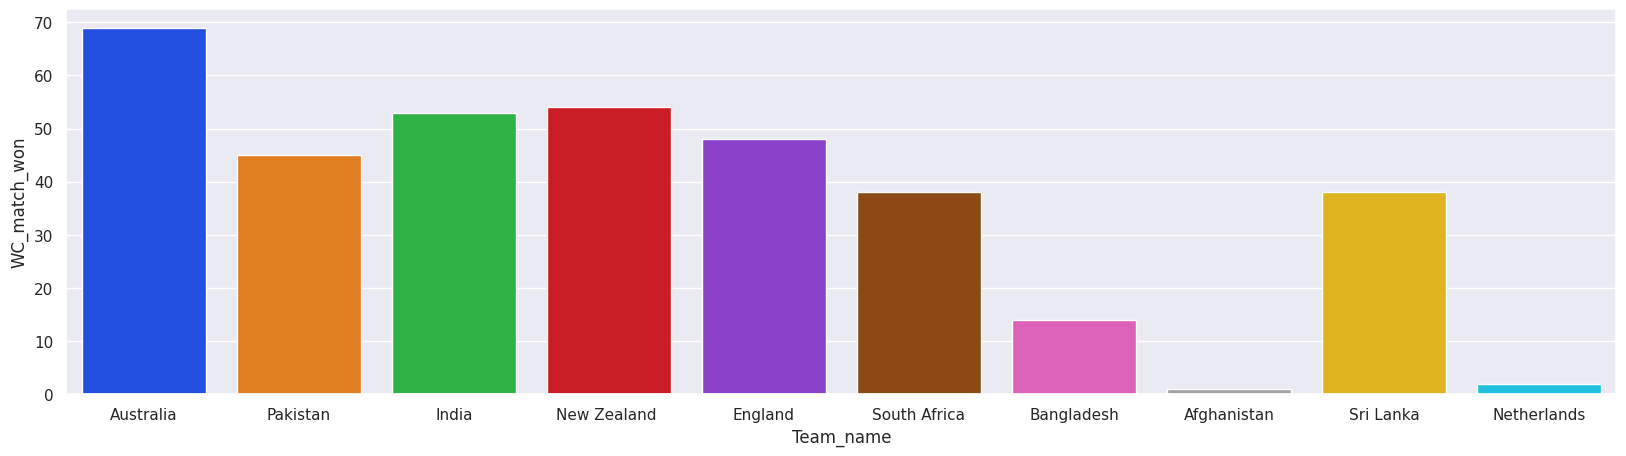

In [7]:
# Number of matches won in world cup by each team
sns.barplot(x='Team_name', y='WC_match_won', data=wc_history)
plt.show()

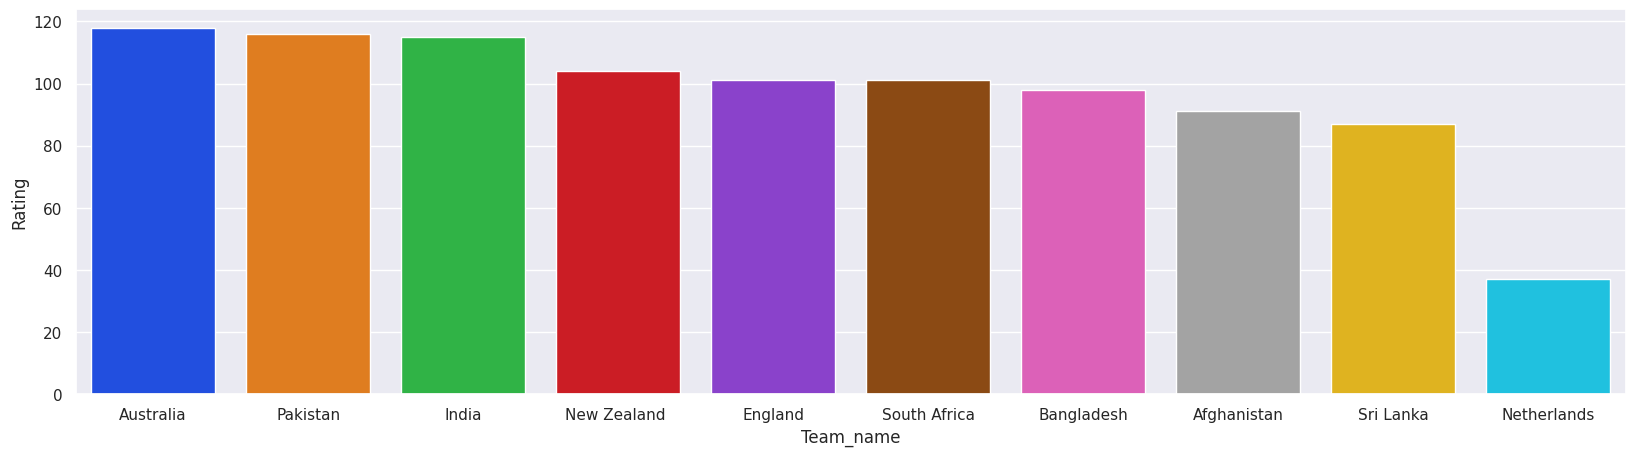

In [8]:
# Recent ICC ODI rating
sns.barplot(x='Team_name', y='Rating', data=wc_history)
plt.show()

# **Stats of top five teams in the ODI World Cup 2023**

***Stats of Team India:***

---



In [9]:
india = odi_results[(odi_results['Team_1'] == 'India') | (odi_results['Team_2'] == 'India')]
india.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
13,21/06/2015,Bangladesh,India,Bangladesh,won by 6 wickets,Shere Bangla National Stadium
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club


In [10]:
india_wins = india[india['Winner'] == 'India']

In [11]:
# Exclude Team India's name
excluded_value = 'India'

# Filtering out rows with the excluded value
filtered_df = india_wins[india_wins['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)

West Indies     6
New Zealand     4
Australia       3
Sri Lanka       3
England         2
South Africa    2
Name: Team_2, dtype: int64


In [12]:
# Exclude Team India's name
excluded_value = 'India'

# Filtering out rows with the excluded value
filtered_df = india_wins[india_wins['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)

Zimbabwe         5
South Africa     5
West Indies      5
Bangladesh       4
Zimbabwe         4
Australia        2
Sri Lanka        2
England          2
England          1
Hong Kong        1
New Zealand      1
Afghanistan      1
Australia        1
Bangladesh       1
Name: Team_1, dtype: int64


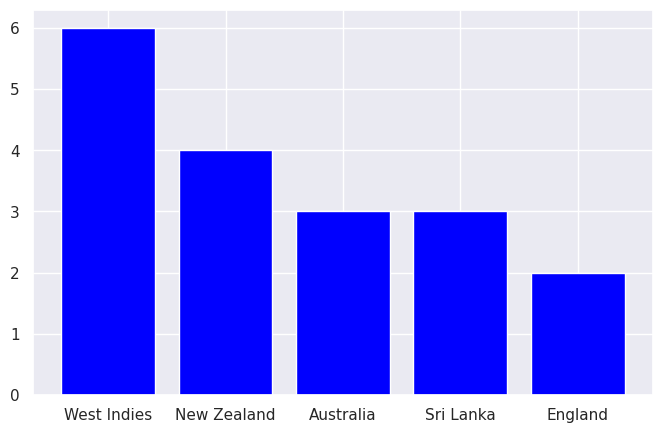

In [13]:
exclude = 'India'

# Filter out the opponent to exclude from the data
filtered_data = india_wins[india_wins['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by India.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="blue")
plt.show()

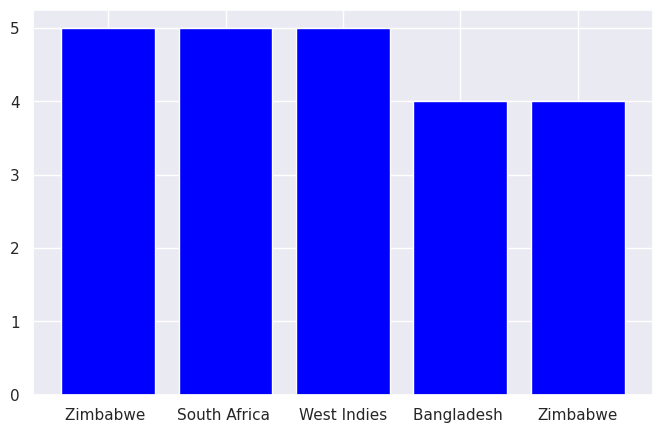

In [14]:
exclude = 'India'

# Filter out the opponent to exclude from the data
filtered_data = india_wins[india_wins['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by India.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="blue")
plt.show()

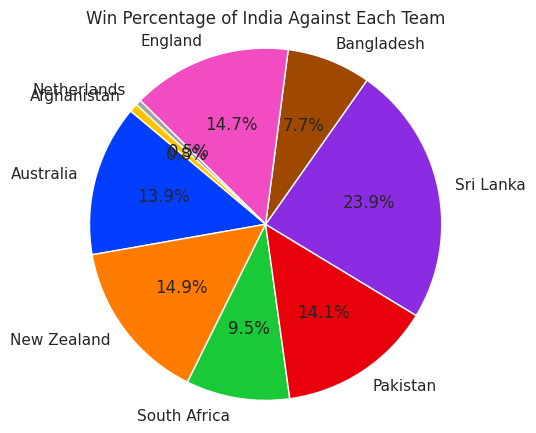

In [15]:
# Number of wins against each team


# Out of the 1032 ODI matches played by India, number of matches won against the following teams
team_win_counts = {
    'Australia': 54,
    'New Zealand': 58,
    'South Africa ': 37,
    'Pakistan': 55,
    'Sri Lanka': 93,
    'Bangladesh': 30,
    'England': 57,
    'Netherlands': 2,
    'Afghanistan': 3
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# India's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of India Against Each Team')

# Display the pie chart
plt.show()


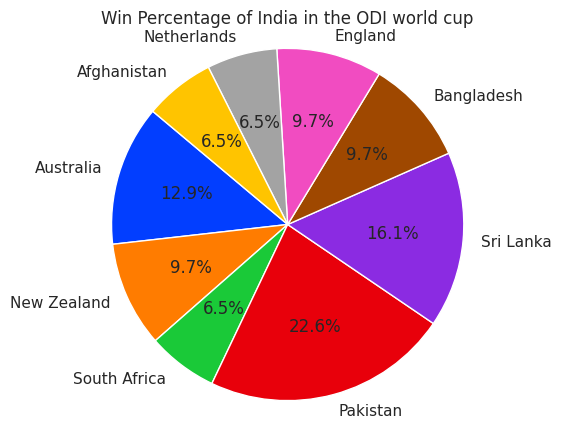

In [16]:
# Number of wins against each team in the ODI world cup

# Out of the 84 ODI matches played by India in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_ind = {
    'Australia': 4,
    'New Zealand': 3,
    'South Africa ': 2,
    'Pakistan': 7,
    'Sri Lanka': 5,
    'Bangladesh': 3,
    'England': 3,
    'Netherlands': 2,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches_wc_ind = sum(team_win_counts_wc_ind.values())

# India's win percentages against each team is calculated
win_percentages_wc_ind = {team: (wins / total_matches_wc_ind) * 100 for team, wins in team_win_counts_wc_ind.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_ind.values(), labels=win_percentages_wc_ind.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of India in the ODI world cup')

# Display the pie chart
plt.show()

***Stats of Team Australia:***

---



In [17]:
australia = odi_results[(odi_results['Team_1'] == 'Australia') | (odi_results['Team_2'] == 'Australia')]
australia.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
32,27/08/2015,Ireland,Australia,Australia,won by 23 runs,Civil Service Cricket Club
33,03/09/2015,England,Australia,Australia,won by 59 runs,The Rose Bowl
34,05/09/2015,England,Australia,Australia,won by 64 runs,Lord's
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
36,11/09/2015,England,Australia,England,won by 3 wickets,Headingley


In [18]:
aus_wins = australia[australia['Winner'] == 'Australia']

In [19]:
# Exclude Team Australia's name
excluded_value = 'Australia'

# Filtering out rows with the excluded value
filtered_df = aus_wins[aus_wins['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)

England         4
New Zealand     4
 Pakistan       2
India           2
Zimbabwe        2
South Africa    1
Pakistan        1
Name: Team_2, dtype: int64


In [20]:
# Exclude Team Australia's name
excluded_value = 'Australia'

# Filtering out rows with the excluded value
filtered_df = aus_wins[aus_wins['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)

Sri Lanka       4
Pakistan        4
West Indies     3
India           3
England         2
Pakistan        2
England         2
West Indies     2
Sri Lanka       2
India           2
New Zealand     1
Afghanistan     1
Name: Team_1, dtype: int64


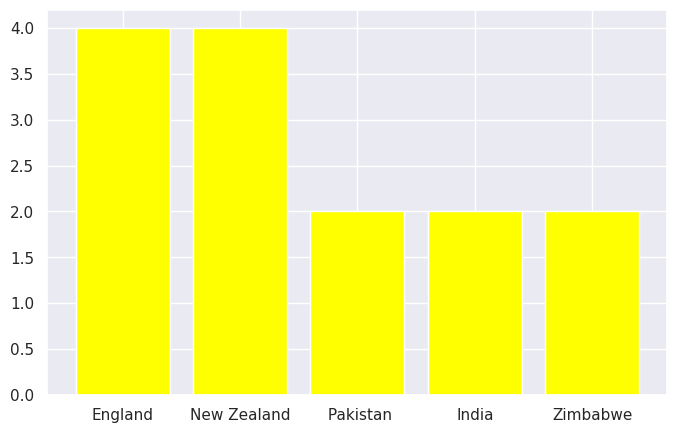

In [21]:
exclude = 'Australia'

# Filter out the opponent to exclude from the data
filtered_data = aus_wins[aus_wins['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by Australia.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="yellow")
plt.show()

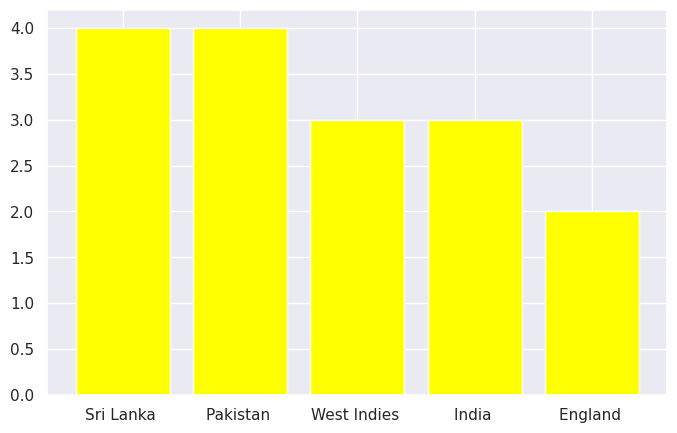

In [22]:
exclude = 'Australia'

# Filter out the opponent to exclude from the data
filtered_data = aus_wins[aus_wins['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by Australia.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="yellow")
plt.show()

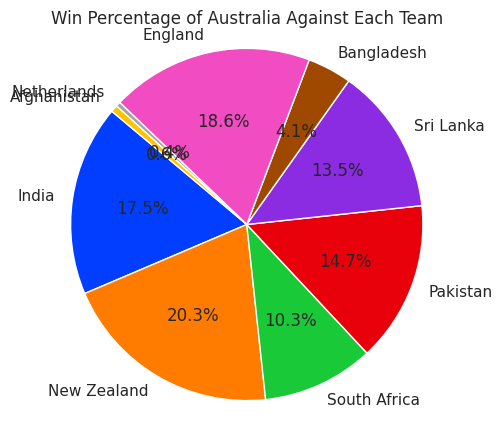

In [23]:
# Number of wins against each team

# Out of the 978 ODI matches played by Australia, number of matches won against the following teams
team_win_counts = {
    'India': 82,
    'New Zealand': 95,
    'South Africa ': 48,
    'Pakistan': 69,
    'Sri Lanka': 63,
    'Bangladesh': 19,
    'England': 87,
    'Netherlands': 2,
    'Afghanistan': 3
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# Australia's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of Australia Against Each Team')

# Display the pie chart
plt.show()


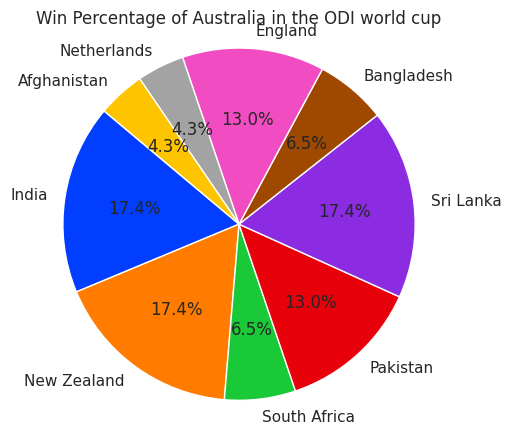

In [24]:
# Number of wins against each team in the ODI world cup

# Out of the 94 ODI matches played by Australia in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_aus = {
    'India': 8,
    'New Zealand': 8,
    'South Africa ': 3,
    'Pakistan': 6,
    'Sri Lanka': 8,
    'Bangladesh': 3,
    'England': 6,
    'Netherlands': 2,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches_wc_aus = sum(team_win_counts_wc_aus.values())

# Australia's win percentages against each team is calculated
win_percentages_wc_aus = {team: (wins / total_matches_wc_aus) * 100 for team, wins in team_win_counts_wc_aus.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_aus.values(), labels=win_percentages_wc_aus.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of Australia in the ODI world cup')

# Display the pie chart
plt.show()

***Stats of Team Pakistan:***

---



In [25]:
pakistan = odi_results[(odi_results['Team_1'] == 'Pakistan') | (odi_results['Team_2'] == 'Pakistan')]
pakistan.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
17,11/07/2015,Sri Lanka,Pakistan,Pakistan,won by 6 wickets,Rangiri Dambulla International Stadium
21,15/07/2015,Sri Lanka,Pakistan,Sri Lanka,won by 2 wickets,Pallekele International Cricket Stadium


In [26]:
pak_wins = pakistan[pakistan['Winner'] == 'Pakistan']

In [27]:
# Exclude Team Pakistan's name
excluded_value = 'Pakistan'

# Filtering out rows with the excluded value
filtered_df = pak_wins[pak_wins['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)

New Zealand    5
West Indies    3
Sri Lanka      2
Zimbabwe       2
Australia      2
Name: Team_2, dtype: int64


In [28]:
# Exclude Team Pakistan's name
excluded_value = 'Pakistan'

# Filtering out rows with the excluded value
filtered_df = pak_wins[pak_wins['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)

Zimbabwe         7
Sri Lanka        3
Netherlands      3
England          2
Afghanistan      2
South Africa     2
Ireland          1
Australia        1
Hong Kong        1
South Africa     1
New Zealand      1
Name: Team_1, dtype: int64


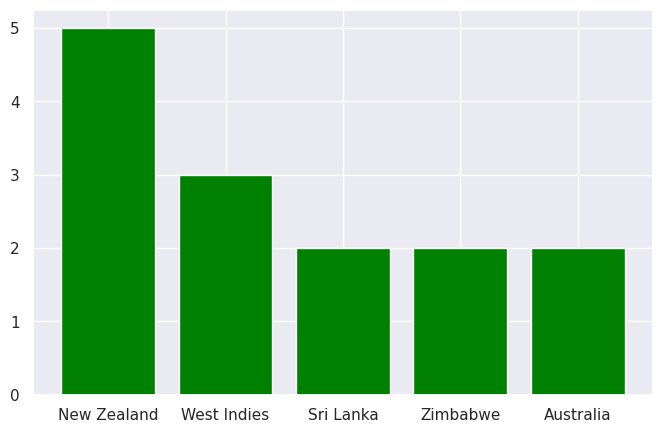

In [29]:
exclude = 'Pakistan'

# Filter out the opponent to exclude from the data
filtered_data = pak_wins[pak_wins['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by Pakistan.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="green")
plt.show()

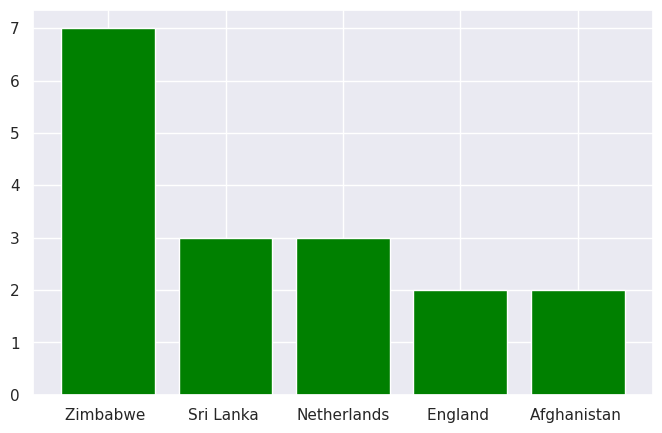

In [30]:
exclude = 'Pakistan'

# Filter out the opponent to exclude from the data
filtered_data = pak_wins[pak_wins['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by Pakistan.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="green")
plt.show()

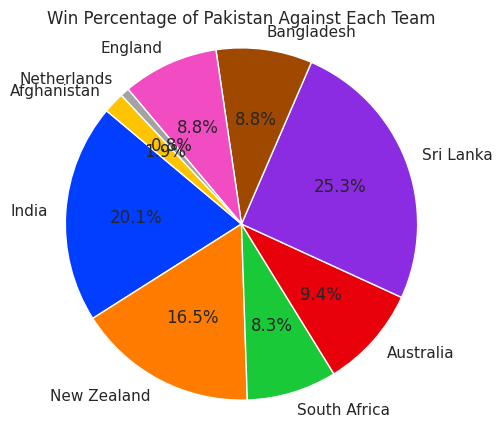

In [31]:
# Number of wins against each team

# Out of the 945 ODI matches played by Pakistan, number of matches won against the following teams
team_win_counts = {
    'India': 73,
    'New Zealand': 60,
    'South Africa ': 30,
    'Australia': 34,
    'Sri Lanka': 92,
    'Bangladesh': 32,
    'England': 32,
    'Netherlands': 3,
    'Afghanistan': 7
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# Pakistan's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of Pakistan Against Each Team')

# Display the pie chart
plt.show()


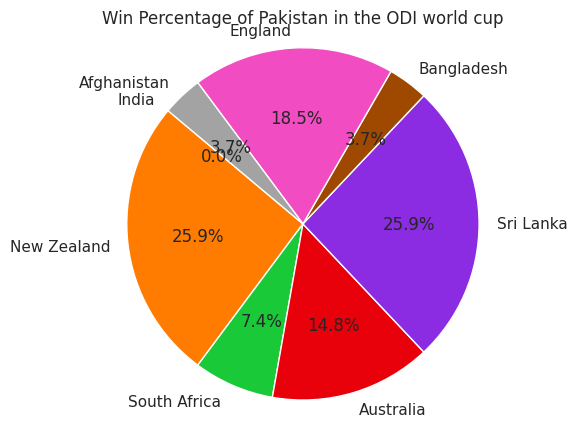

In [32]:
# Number of wins against each team in the ODI world cup

# Out of the 79 ODI matches played by Pakistan in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_pak = {
    'India': 0,
    'New Zealand': 7,
    'South Africa ': 2,
    'Australia': 4,
    'Sri Lanka': 7,
    'Bangladesh': 1,
    'England': 5,
    'Afghanistan': 1
}


# Total matches played is calculated
total_matches_wc_pak = sum(team_win_counts_wc_pak.values())

# Pakistan's win percentages against each team is calculated
win_percentages_wc_pak = {team: (wins / total_matches_wc_pak) * 100 for team, wins in team_win_counts_wc_pak.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_pak.values(), labels=win_percentages_wc_pak.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of Pakistan in the ODI world cup')

# Display the pie chart
plt.show()

***Stats of Team New Zealand:***

---



In [33]:
nz = odi_results[(odi_results['Team_1'] == 'New Zealand') | (odi_results['Team_2'] == 'New Zealand')]
nz.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
7,09/06/2015,England,New Zealand,England,won by 210 runs,Edgbaston
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
9,14/06/2015,England,New Zealand,New Zealand,won by 3 wickets,The Rose Bowl
10,17/06/2015,England,New Zealand,England,won by 7 wickets,Trent Bridge
12,20/06/2015,England,New Zealand,England,won by 3 wickets,Riverside Ground


In [34]:
nz_wins = nz[nz['Winner'] == 'New Zealand']

In [35]:
# Exclude Team New Zealand's name
excluded_value = 'New Zealand'

# Filtering out rows with the excluded value
filtered_df = nz_wins[nz_wins['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)

Bangladesh      5
India           4
Sri Lanka       3
Netherlands     3
Pakistan        2
Australia       1
South Africa    1
Name: Team_2, dtype: int64


In [36]:
# Exclude Team New Zealand's name
excluded_value = 'New Zealand'

# Filtering out rows with the excluded value
filtered_df = nz_wins[nz_wins['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)

India           3
Pakistan        3
Ireland         3
Zimbabwe        2
West Indies     2
Ireland         1
Bangladesh      1
Afghanistan     1
Scotland        1
Name: Team_1, dtype: int64


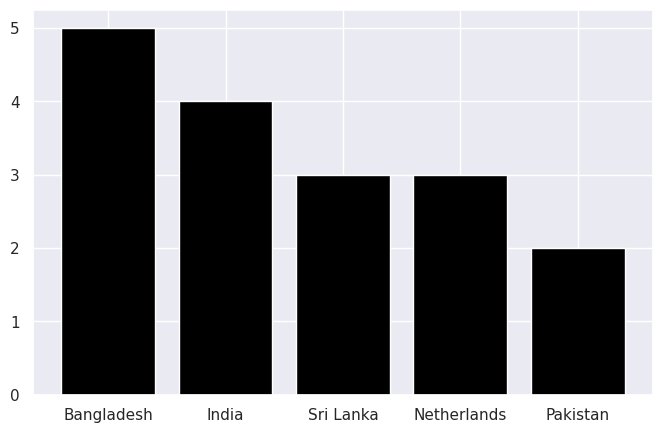

In [37]:
exclude = 'New Zealand'

# Filter out the opponent to exclude from the data
filtered_data = nz_wins[nz_wins['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by New Zealand.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="black")
plt.show()

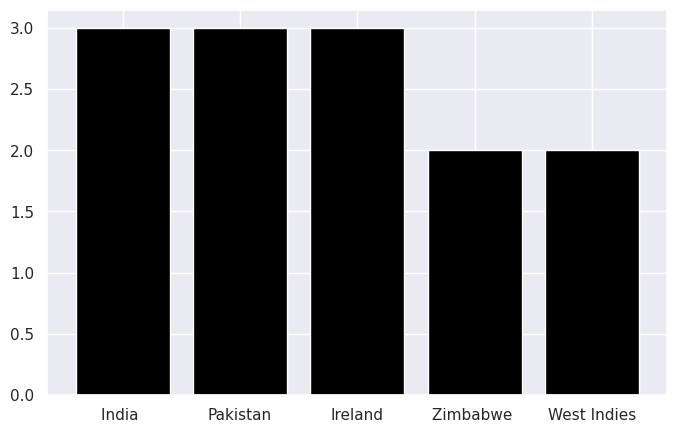

In [38]:
exclude = 'New Zealand'

# Filter out the opponent to exclude from the data
filtered_data = nz_wins[nz_wins['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by New Zealand.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="black")
plt.show()

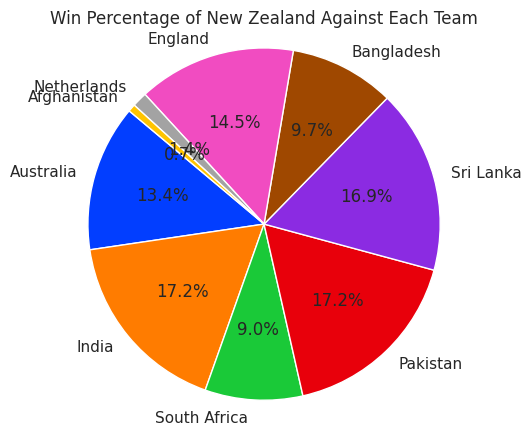

In [39]:
# Number of wins against each team

# Out of the 794 ODI matches played by New Zealand, number of matches won against the following teams
team_win_counts = {
    'Australia': 39,
    'India': 50,
    'South Africa ': 26,
    'Pakistan': 50,
    'Sri Lanka': 49,
    'Bangladesh':28,
    'England': 42,
    'Netherlands': 4,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# New Zealand's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of New Zealand Against Each Team')

# Display the pie chart
plt.show()


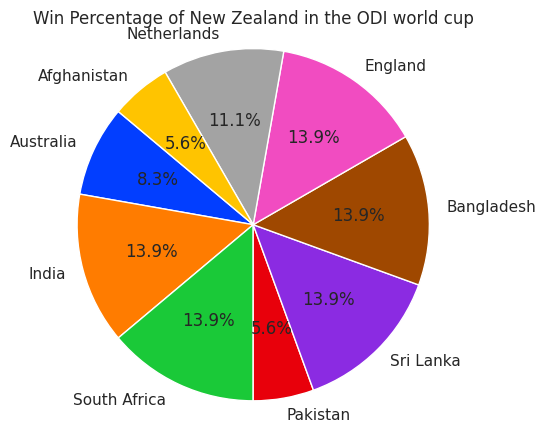

In [40]:
# Number of wins against each team in the ODI world cup

# Out of the 89 ODI matches played by New Zealand in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_nz = {
    'Australia': 3,
    'India': 5,
    'South Africa ': 5,
    'Pakistan': 2,
    'Sri Lanka': 5,
    'Bangladesh': 5,
    'England': 5,
    'Netherlands': 4,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches_wc_nz = sum(team_win_counts_wc_nz.values())

# New Zealand's win percentages against each team is calculated
win_percentages_wc_nz = {team: (wins / total_matches_wc_nz) * 100 for team, wins in team_win_counts_wc_nz.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_nz.values(), labels=win_percentages_wc_nz.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of New Zealand in the ODI world cup')

# Display the pie chart
plt.show()

***Stats of Team England:***

---



In [41]:
england = odi_results[(odi_results['Team_1'] == 'England') | (odi_results['Team_2'] == 'England')]
england.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
55,11/11/2015,Pakistan,England,Pakistan,Pakistan won by 6 wickets,Sheikh Zayed Stadium
57,13/11/2015,Pakistan,England,England,England won by 95 runs,Sheikh Zayed Stadium
58,17/11/2015,Pakistan,England,England,England won by 6 wickets,Sharjah Cricket Stadium


In [42]:
eng_wins = england[england['Winner'] == 'England']

In [43]:
# Exclude Team India's name
excluded_value = 'England'

# Filtering out rows with the excluded value
filtered_df = eng_wins[eng_wins['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)

Pakistan        5
Australia       2
India           2
New Zealand     2
Ireland         2
Sri Lanka       2
West Indies     1
South Africa    1
Name: Team_2, dtype: int64


In [44]:
# Exclude Team India's name
excluded_value = 'England'

# Filtering out rows with the excluded value
filtered_df = eng_wins[eng_wins['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)

Australia        4
Netherlands      3
South Africa     2
Bangladesh       2
New Zealand      2
Sri Lanka        2
South Africa     2
Bangladesh       2
Pakistan         1
West Indies      1
New Zealand      1
Sri Lanka        1
Ireland          1
India            1
Name: Team_1, dtype: int64


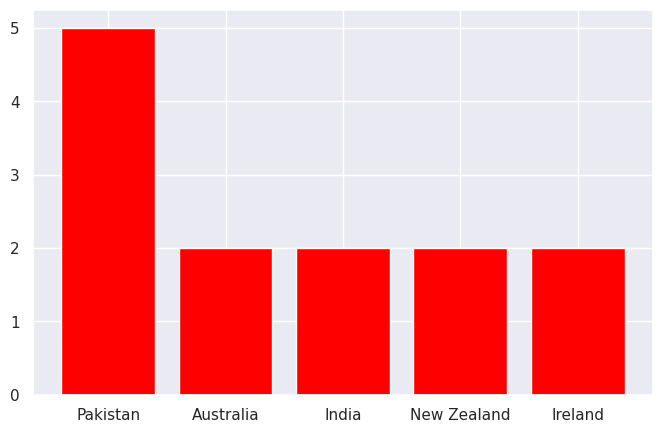

In [45]:
exclude = 'England'

# Filter out the opponent to exclude from the data
filtered_data = eng_wins[eng_wins['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by England.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="red")
plt.show()

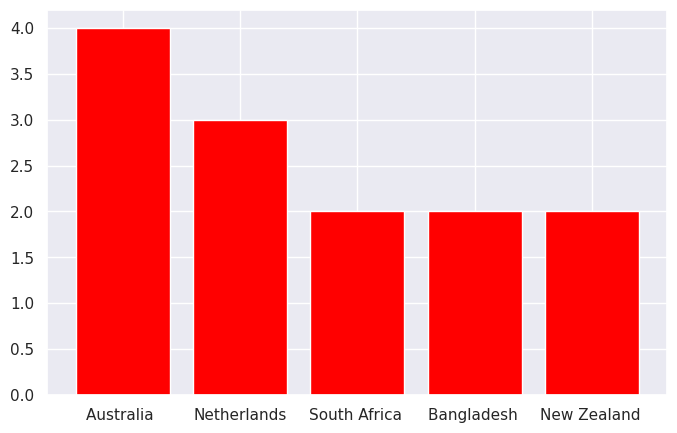

In [46]:
exclude = 'England'

# Filter out the opponent to exclude from the data
filtered_data = eng_wins[eng_wins['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by England.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="red")
plt.show()

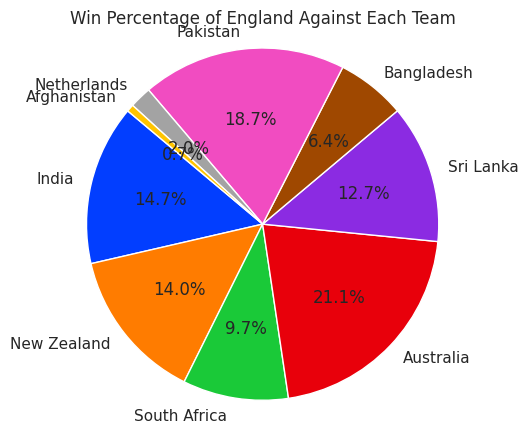

In [47]:
# Number of wins against each team

# Out of the 775 ODI matches played by England, number of matches won against the following teams
team_win_counts = {
    'India': 44,
    'New Zealand': 42,
    'South Africa ': 29,
    'Australia': 63,
    'Sri Lanka': 38,
    'Bangladesh': 19,
    'Pakistan': 56,
    'Netherlands': 6,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# England's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of England Against Each Team')

# Display the pie chart
plt.show()


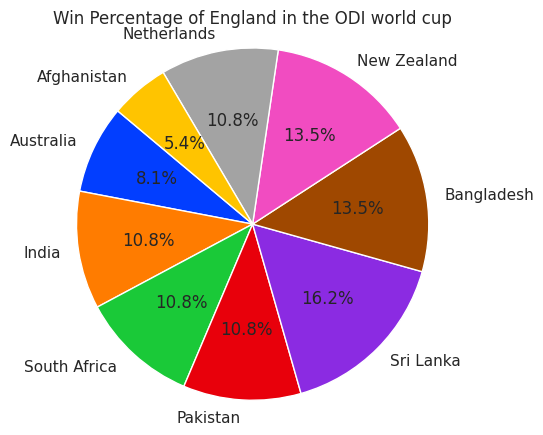

In [48]:
# Number of wins against each team in the ODI world cup

# Out of the 83 ODI matches played by England in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_eng = {
    'Australia': 3,
    'India': 4,
    'South Africa ': 4,
    'Pakistan': 4,
    'Sri Lanka': 6,
    'Bangladesh': 5,
    'New Zealand': 5,
    'Netherlands': 4,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches_wc_eng = sum(team_win_counts_wc_eng.values())

# England's win percentages against each team is calculated
win_percentages_wc_eng = {team: (wins / total_matches_wc_eng) * 100 for team, wins in team_win_counts_wc_eng.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_eng.values(), labels=win_percentages_wc_eng.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of England in the ODI world cup')

# Display the pie chart
plt.show()

# **Exploratory Data Analysis**

In [49]:
# Nations participating in the world cup
worldcup_teams = ['England', ' South Africa', 'West Indies', 'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']

# Filtering matches involving only teams in the 'worldcup_teams' list
df_teams_1 = odi_results[odi_results['Team_1'].isin(worldcup_teams)]  # Extracts matches with Team_1 in 'worldcup_teams'
df_teams_2 = odi_results[odi_results['Team_2'].isin(worldcup_teams)]  # Extracts matches with Team_2 in 'worldcup_teams'

df_teams = pd.concat((df_teams_1, df_teams_2))  # Concatenates the two dataframes vertically

df_teams.drop_duplicates()  # Removes duplicate rows if any

df_teams.count()  # Counts the number of rows in the final dataframe


Date      748
Team_1    748
Team_2    748
Winner    748
Margin    748
Ground    748
dtype: int64

In [50]:
df_teams.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
53,07/11/2015,Sri Lanka,West Indies,Sri Lanka,Sri Lanka won by 19 runs,Pallekele International Cricket Stadium
56,11/11/2015,Bangladesh,Zimbabwe,Bangladesh,Bangladesh won by 61 runs,Shere Bangla National Stadium


In [51]:
# Removing unnecessary columns from df_teams
df_teams_2019 = df_teams.drop(['Date','Margin', 'Ground'], axis=1)
df_teams_2019.head()

,Team_1,Team_2,Winner
8,England,New Zealand,New Zealand
11,Bangladesh,India,Bangladesh
35,England,Australia,England
53,Sri Lanka,West Indies,Sri Lanka
56,Bangladesh,Zimbabwe,Bangladesh


**Feature Selection**

In [52]:
# Reset the index of df_teams_2019
df_teams_2019 = df_teams_2019.reset_index(drop=True)

# Set a value of 1 in the 'winning_team' column for rows where the 'Winner' column is the same as the 'Team_1' column.
df_teams_2019.loc[df_teams_2019.Winner == df_teams_2019.Team_1,'winning_team']=1

# Set a value of 2 in the 'winning_team' column for rows where the 'Winner' column is the same as the 'Team_2' column.
df_teams_2019.loc[df_teams_2019.Winner == df_teams_2019.Team_2, 'winning_team']=2

# Drop the 'winning_team' column from the DataFrame.
df_teams_2019 = df_teams_2019.drop(['winning_team'], axis=1)

df_teams_2019.head()

,Team_1,Team_2,Winner
0,England,New Zealand,New Zealand
1,Bangladesh,India,Bangladesh
2,England,Australia,England
3,Sri Lanka,West Indies,Sri Lanka
4,Bangladesh,Zimbabwe,Bangladesh


# Training and Testing the data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Creating dummy variables for team names
final = pd.get_dummies(df_teams_2019, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

X = final.drop(['Winner'], axis=1)  # Extracting features by dropping the 'Winner' column
y = final["Winner"]  # Assigning the 'Winner' column as the target variable

# Split the data into training and testing sets using a test size of 30% and a random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
final.head()

,Winner,Team_1_Afghanistan,Team_1_Afghanistan,Team_1_Australia,Team_1_Australia,Team_1_Bangladesh,Team_1_Bangladesh,Team_1_England,Team_1_England,Team_1_Hong Kong,...,Team_2_India,Team_2_Ireland,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_United Arab Emirates,Team_2_West Indies,Team_2_Zimbabwe
0,New Zealand,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Bangladesh,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,England,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sri Lanka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Bangladesh,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Random Forest Classifier Algorithm

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=2)


rf.fit(X_train, y_train)


pred = rf.predict(X_test)

train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(train_score))
print("Test set accuracy: ", '%.3f'%(test_score))

Training set accuracy:  0.740
Test set accuracy:  0.671


In [57]:
ranking = pd.read_csv('/content/drive/MyDrive/data/icc_team_ranking.csv')
fixtures = pd.read_csv('/content/drive/MyDrive/data/wc2023_fixtures.csv')

pred_set = []  # Initialize an empty list to store prediction results

In [58]:
# Insert team rankings into the fixtures dataframe based on 'Team_1' and 'Team_2' columns.
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team_name')['Team_ranking']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team_name')['Team_ranking']))

# Select the first 45 rows of the updated fixtures dataframe for league stage matches.
fixtures = fixtures.iloc[:45, :]
fixtures.head()

,Round_number,first_position,second_position,Team_1,Team_2,Date,Location,Group,Result
0,1,5.0,NaN,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,NaN,10.0,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,7.0,8.0,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,6.0,9.0,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,3.0,1.0,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN


In [59]:
# Filling in the missing values in 'first_position' and 'second_position' columns with their respective means.
fixtures['first_position']=fixtures['first_position'].fillna(fixtures['first_position'].mean())
fixtures['second_position']=fixtures['second_position'].fillna(fixtures['second_position'].mean())

fixtures.head()

,Round_number,first_position,second_position,Team_1,Team_2,Date,Location,Group,Result
0,1,5.000000,7.119048,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,4.411765,10.000000,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,7.000000,8.000000,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,6.000000,9.000000,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,3.000000,1.000000,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN


In [60]:
# Predicting winning teams based on positions in fixtures.
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})

pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,Team_1,Team_2,winning_team
0,England,New Zealand,None
1,Pakistan,Netherlands,None
2,Bangladesh,Afghanistan,None
3,South Africa,Sri Lanka,None
4,Australia,India,None


In [61]:
# Transforming the dataset using one-hot encoding for 'Team_1' and 'Team_2' columns.
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Finding missing columns in the final dataset compared to the transformed 'pred_set'.
missing_cols = set(final.columns) - set(pred_set.columns)

# Setting the missing columns in "pred_set" DataFrame to 0 and then keeps only the columns present in the "final" DataFrame.
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Dropping the 'Winner' column from pred_set
pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Afghanistan,Team_1_Australia,Team_1_Australia,Team_1_Bangladesh,Team_1_Bangladesh,Team_1_England,Team_1_England,Team_1_Hong Kong,Team_1_Hong Kong,...,Team_2_India,Team_2_Ireland,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_United Arab Emirates,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Interpret the model results**

In [62]:
# Making predictions using 'rf' on 'pred_set' and printing the winners for each fixture based on the prediction
predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " vs " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])

    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

New Zealand vs England
Winner: England

Netherlands vs Pakistan 
Winner: Pakistan 

Afghanistan vs Bangladesh
Winner: Bangladesh

Sri Lanka vs South Africa
Winner: South Africa

India vs Australia
Winner: Australia

Netherlands vs New Zealand
Winner: New Zealand

Bangladesh vs England
Winner: England

Afghanistan vs India
Winner: India

Sri Lanka vs Pakistan 
Winner: Pakistan 

South Africa vs Australia
Winner: Australia

Bangladesh vs New Zealand
Winner: New Zealand

Afghanistan vs England
Winner: England

India vs Pakistan
Winner: Pakistan

Sri Lanka vs Australia
Winner: Australia

Netherlands vs South Africa
Winner: South Africa

Afghanistan vs New Zealand
Winner: New Zealand

Bangladesh vs India
Winner: India

Pakistan vs Australia
Winner: Australia

Netherlands vs Sri Lanka
Winner: Sri Lanka

South Africa vs England
Winner: England

New Zealand vs India
Winner: India

Afghanistan vs Pakistan 
Winner: Pakistan 

Bangladesh vs South Africa
Winner: South Africa

Netherlands vs Austra

In [63]:
# The teams qualified for semi-finals based on wins.
semis = [('Pakistan', 'Australia'), ('England', 'India')]

In [64]:
def clean_and_predict(matches, ranking, final, rf):
    # Initialize an empty list to store the positions of teams in the ranking
    positions = []

    # Loop through the list of matches and add the rankings of the teams to the positions list
    for match in matches:
        positions.append(ranking.loc[ranking['Team_name'] == match[0], 'Team_ranking'].iloc[0])
        positions.append(ranking.loc[ranking['Team_name'] == match[0], 'Team_ranking'].iloc[0])

    pred_set = []

    i = 0
    j = 0

    # Loop through the positions list to create match predictions
    while i < len(positions):
        dict1 = {}
        # Compare the positions of the two teams in the match and add the corresponding team names to the prediction dictionary
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Add the prediction dictionary to the pred_set list
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert the pred_set list into a pandas DataFrame
    pred_set = pd.DataFrame(pred_set)

    backup_pred_set = pred_set

    # Convert categorical variables in the pred_set DataFrame into dummy variables
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Identify missing columns in pred_set compared to the final DataFrame
    missing_cols2 = set(final.columns) - set(pred_set.columns)

    # Add the missing columns to the pred_set DataFrame and set their values to 0
    for c in missing_cols2:
        pred_set[c] = 0

    # Reorder pred_set columns to match the final DataFrame's order
    pred_set = pred_set[final.columns]

    # Drop the 'Winner' column from the pred_set DataFrame
    pred_set = pred_set.drop(['Winner'], axis=1)

    # Use the provided classifier (cls) to make predictions on the pred_set DataFrame
    predictions = rf.predict(pred_set)

    # Loop through the pred_set DataFrame and print the match predictions and winners
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " vs " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [65]:
clean_and_predict(semis, ranking, final, rf)

Pakistan vs Australia
Winner: Australia

England vs India
Winner: India



In [66]:
finals = [('Australia', 'India')]

In [67]:
clean_and_predict(finals, ranking, final, rf)

Australia vs India
Winner: India

